# NIST NBS tables exploratory data analysis

The goal of this notebook is to explore, check, and clear the publicly available [NIST NBS Tables](https://data.nist.gov/od/id/mds2-2124) in order to understand and provide insights about the data. This notebook also prepares the data for further developments, like machine learning std properties estimation.

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from pathlib import Path
import os

DATA_PATH = Path(os.environ.get("DATAPATH"))

pio.renderers.default = "png"

Reading the raw data:

In [2]:
df_nist_table_raw = pd.read_csv(DATA_PATH / "NBS_Tables.csv", skiprows=1)

df_nist_table_raw

,Formula,Solvent,Name,State\nDescription,State,Molar Mass\ng mol-1,ΔfH0°\nkJ mol-1,ΔfH°,ΔfG°\nkJ mol-1,H°-H0°,S° \nJ mol-1 K-1,Cp\nJ mol-1 K-1,Unnamed: 12
0,Table 1:O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oxygen (Prepared 1963),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O,NaN,NaN,NaN,g,15.9994,246.785,249.170,231.731,6.724,161.055,21.912,NaN
3,O<sup>+</sup>,NaN,NaN,NaN,g,15.9994,1560.716,1568.770,-,6.197,-,-,NaN
4,O<sup>2+</sup>,NaN,NaN,NaN,g,15.9994,4949.00,4964.94,-,7.883,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convenient columns renaming:

In [3]:
columns_to_rename = {
    "State\nDescription": "State Description",
    "Molar Mass\ng mol-1": "Molar Mass",
    "ΔfH°": "deltaH0",
    "ΔfG°\nkJ mol-1": "deltaG0",
    "       S°              \nJ mol-1 K-1": "S0",
    "Cp\nJ mol-1 K-1": "Cp"
}
df_nist_table_cols_renamed = df_nist_table_raw.rename(columns=columns_to_rename)

df_nist_table_cols_renamed

,Formula,Solvent,Name,State Description,State,Molar Mass,ΔfH0°\nkJ mol-1,deltaH0,deltaG0,H°-H0°,S0,Cp,Unnamed: 12
0,Table 1:O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oxygen (Prepared 1963),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O,NaN,NaN,NaN,g,15.9994,246.785,249.170,231.731,6.724,161.055,21.912,NaN
3,O<sup>+</sup>,NaN,NaN,NaN,g,15.9994,1560.716,1568.770,-,6.197,-,-,NaN
4,O<sup>2+</sup>,NaN,NaN,NaN,g,15.9994,4949.00,4964.94,-,7.883,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select only the columns of interest:

In [4]:
df_nist_table_cols_renamed.columns

Index(['Formula', 'Solvent', 'Name', 'State Description', 'State',
       'Molar Mass', 'ΔfH0°\nkJ mol-1', 'deltaH0', 'deltaG0', 'H°-H0°', 'S0',
       'Cp', 'Unnamed: 12'],
      dtype='object')

In [5]:
target_columns = [
    "Formula", "State", "Molar Mass", "deltaH0", "deltaG0", "S0", "Cp"
]

df_nist_tables_full = df_nist_table_cols_renamed[target_columns].copy()

df_nist_tables_full.head(30)

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp
0,Table 1:O,NaN,NaN,NaN,NaN,NaN,NaN
1,Oxygen (Prepared 1963),NaN,NaN,NaN,NaN,NaN,NaN
2,O,g,15.9994,249.170,231.731,161.055,21.912
3,O<sup>+</sup>,g,15.9994,1568.770,-,-,-
4,O<sup>2+</sup>,g,15.9994,4964.94,-,-,-
5,O<sup>3+</sup>,g,15.9994,10271.01,-,-,-
6,O<sup>4+</sup>,g,15.9994,17745.35,-,-,-
7,O<sup>5+</sup>,g,15.9994,28741.03,-,-,-
8,O<sup>6+</sup>,g,15.9994,42073.5,-,-,-
9,O<sup>7+</sup>,g,15.9994,113412.,-,-,-


Replace `-` fields by NaN:

In [6]:
df_nist_tables_full.replace({r"\*": ""}, regex=True, inplace=True)
df_nist_tables_full.replace("-", np.nan, inplace=True)

df_nist_tables_full.head(30)

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp
0,Table 1:O,NaN,NaN,NaN,NaN,NaN,NaN
1,Oxygen (Prepared 1963),NaN,NaN,NaN,NaN,NaN,NaN
2,O,g,15.9994,249.170,231.731,161.055,21.912
3,O<sup>+</sup>,g,15.9994,1568.770,NaN,NaN,NaN
4,O<sup>2+</sup>,g,15.9994,4964.94,NaN,NaN,NaN
5,O<sup>3+</sup>,g,15.9994,10271.01,NaN,NaN,NaN
6,O<sup>4+</sup>,g,15.9994,17745.35,NaN,NaN,NaN
7,O<sup>5+</sup>,g,15.9994,28741.03,NaN,NaN,NaN
8,O<sup>6+</sup>,g,15.9994,42073.5,NaN,NaN,NaN
9,O<sup>7+</sup>,g,15.9994,113412.,NaN,NaN,NaN


In [7]:
df_nist_tables_full["State"].value_counts()

State
cr     4483
g      1850
ai     1241
ao     1042
aq      393
l       239
cr2     150
am       49
g2       37
vit      36
cr3      27
l2       21
aq2      20
ao2       9
cr4       6
g3        5
ai2       4
l3        4
cr5       3
cr1       2
ai4       1
ao4       1
aq3       1
Name: count, dtype: int64

Now, we can clean the entries that have any NaN since whatever the NaN is, it is not possible to be used in our analysis.

In [8]:
df_nist_tables = df_nist_tables_full.dropna(ignore_index=True)

df_nist_tables.head(30)

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp
0,O,g,15.9994,249.170,231.731,161.055,21.912
1,O2,g,31.9988,0,0,205.138,29.355
2,O3,g,47.9982,142.7,163.2,238.93,39.20
3,H,g,1.0080,217.965,203.247,114.713,20.784
4,H<sup>+</sup>,ao,1.0080,0,0,0,0
5,D,g,2.0141,221.673,206.506,123.349,20.786
6,H2,g,2.016,0,0,130.684,28.824
7,D2,g,4.0282,0,0,144.960,29.196
8,HD,g,3.0221,0.318,-1.464,143.801,29.196
9,OH,g,17.0074,38.95,34.23,183.745,29.886


Let's check what left:

In [9]:
df_nist_tables['State'].value_counts()

State
cr     711
g      531
ai      99
l       75
ao      39
cr2     27
g2      14
cr3      8
l2       7
am       4
g3       2
cr4      2
l3       1
Name: count, dtype: int64

In [10]:
print(f"Species: {df_nist_tables.shape[0]}\t Fields: {df_nist_tables.shape[1]}")

Species: 1520	 Fields: 7


Let's now add a new feature to help our analysis (species' eletric charge):

In [11]:
df_nist_tables['Charge'] = df_nist_tables.shape[0] * [0.0]

df_nist_tables

/tmp/ipykernel_4357/3043640083.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge
0,O,g,15.9994,249.170,231.731,161.055,21.912,0.0
1,O2,g,31.9988,0,0,205.138,29.355,0.0
2,O3,g,47.9982,142.7,163.2,238.93,39.20,0.0
3,H,g,1.0080,217.965,203.247,114.713,20.784,0.0
4,H<sup>+</sup>,ao,1.0080,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
1515,CsBO2,g,175.7152,-703.3,-708.8,314.41,59.41,0.0
1516,CsAl(SO4)2·12H2O,cr,568.1949,-6094.8,-5167.4,686.09,614.6,0.0
1517,CsCuCl3,cr,302.8044,-698.7,-627.1,213.38,127.82,0.0
1518,Cs2Cr2O7,cr,481.7986,-2088.82,-1908.17,330.08,231.54,0.0


We need to update the values according to the species' actual charges:

In [12]:
import re

for index, row in df_nist_tables.iterrows():
    species_formula = row["Formula"]
    if "sup" in species_formula:
        numbers_in_formula_name = re.findall(r'\d+', species_formula)
        # Cations
        if "<sup>+" in species_formula:
            df_nist_tables.loc[index, "Charge"] = 1.0
        elif "+" in species_formula:
            df_nist_tables.loc[index, "Charge"] = float(numbers_in_formula_name[-1])
            
        # Anions
        if "<sup>-" in species_formula:
            df_nist_tables.loc[index, "Charge"] = -1.0
        elif "-" in species_formula:
            df_nist_tables.loc[index, "Charge"] = -float(numbers_in_formula_name[-1])
        
        # Uncomment to verify the modifications
        # print(
        #     f"Formula: {row["Formula"]}\t Found numbers: {numbers_in_formula_name}\t Charge: {df_nist_tables.loc[index, "Charge"]}"
        # )

In [13]:
df_nist_tables.head(30)

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge
0,O,g,15.9994,249.170,231.731,161.055,21.912,0.0
1,O2,g,31.9988,0,0,205.138,29.355,0.0
2,O3,g,47.9982,142.7,163.2,238.93,39.20,0.0
3,H,g,1.0080,217.965,203.247,114.713,20.784,0.0
4,H<sup>+</sup>,ao,1.0080,0,0,0,0,1.0
5,D,g,2.0141,221.673,206.506,123.349,20.786,0.0
6,H2,g,2.016,0,0,130.684,28.824,0.0
7,D2,g,4.0282,0,0,144.960,29.196,0.0
8,HD,g,3.0221,0.318,-1.464,143.801,29.196,0.0
9,OH,g,17.0074,38.95,34.23,183.745,29.886,0.0


Exporting the preprocessed data to a `csv` file to aid further studies:

In [14]:
df_nist_tables.to_csv(DATA_PATH / "NBS_Tables_preprocessed.csv")

### Extending the Database with new features

However, only the data provided in NIST/NBS as "it is" may be insuficient. So let's extend it with Se (the sum of the entropy of each element in the species).

#### Adding Se and number of elements of each chemical species

Convenient function to parse chemical species formulas and retrieve the elements that compose the formula:

In [15]:
def parse_chemical_formula(formula: str) -> dict[str, int]:
    """
    Convenient function to parser and get the amount of elements in
    chemical species formulas.
    """
    import re
    from collections import defaultdict
    
    # Function to parse a molecule or sub-molecule
    def parse_molecule(molecule, multiplier=1):
        elements = re.findall(r'([A-Z][a-z]*)(\d*)', molecule)
        for element, count in elements:
            count = int(count) if count else 1
            element_counts[element] += count * multiplier

    # Remove HTML charge notations
    formula = re.sub(r'<[^>]+>', '', formula)

    # Split the formula into molecules and process each part
    element_counts = defaultdict(int)
    molecules = formula.split('·')
    
    for molecule in molecules:
        # Handle molecules with and without parentheses
        if '(' in molecule:
            while '(' in molecule:
                # Find and replace the innermost parenthetical expression
                sub_molecule, sub_multiplier = re.search(r'\(([A-Za-z0-9]+)\)(\d*)', molecule).groups()
                sub_multiplier = int(sub_multiplier) if sub_multiplier else 1
                molecule = re.sub(r'\(([A-Za-z0-9]+)\)(\d*)', '', molecule, 1)
                parse_molecule(sub_molecule, sub_multiplier)
        
        # Handle preffix-like multiplier
        else:
            sub_multiplier, sub_molecule = re.search(r'(\d*)([A-Za-z0-9]+)', molecule).groups()
            sub_multiplier = int(sub_multiplier) if sub_multiplier else 1
            molecule = re.sub(r'(\d*)([A-Za-z0-9]+)', '', molecule, 1)
            parse_molecule(sub_molecule, sub_multiplier)
            
        # Process the remaining parts of the molecule
        parse_molecule(molecule)

    return dict(element_counts)

Reading elements' data (with the entropy of each element) from [CHNOSZ](https://github.com/jedick/CHNOSZ/blob/main/inst/extdata/thermo/element.csv). Use it to create an equivalent using NIST/NBS tables data (it means that we recover the Se using the values provided in the NIST tables).

In [16]:
df_chnosz_elements = pd.read_csv(DATA_PATH / "chnosz_elements (modified).csv")

df_chnosz_elements

,element,state,source,mass,s,n
0,Z,aq,CWM89,0.00000,-15.616635,1
1,O,gas,CWM89,15.99940,49.032505,2
2,H,gas,CWM89,1.00794,31.233270,2
3,He,gas,CWM89,4.00260,30.151291,1
4,Ne,gas,CWM89,20.17900,34.973231,1
...,...,...,...,...,...,...
129,Fr,cr,WEP+82,223.00000,22.801147,1
130,Pu,cr,THBC14,NaN,13.016250,1
131,Am,cr,THBC14,NaN,13.240920,1
132,Np,cr,THBC14,NaN,12.060230,1


In [17]:
map_states_chnosz_to_nist = {
    "gas": "g",
    "liq": "l",
    "aq": "ao"
}

df_chnosz_elements.replace(map_states_chnosz_to_nist, inplace=True)

df_chnosz_elements.head(20)

,element,state,source,mass,s,n
0,Z,ao,CWM89,0.00000,-15.616635,1
1,O,g,CWM89,15.99940,49.032505,2
2,H,g,CWM89,1.00794,31.233270,2
3,He,g,CWM89,4.00260,30.151291,1
4,Ne,g,CWM89,20.17900,34.973231,1
5,Ar,g,CWM89,39.94800,37.009082,1
6,Kr,g,CWM89,83.80000,39.217256,1
7,Xe,g,CWM89,131.29000,40.555688,1
8,F,g,CWM89,18.99840,48.468212,2
9,Cl,g,CWM89,35.45300,53.317639,2


Replicating the same structure of CHNOSZ element data, but now using values collected from NIST tables:

In [18]:
nist_elements = {
    "element": [],
    "state": [],
    "S0": [],
}

for index, row in df_chnosz_elements.iterrows():
    element_name = row["element"]
    if element_name == "Z":
        continue
    
    element_state = row["state"]
    element_n = row["n"]
    suffix_name = element_n if int(element_n) > 1 else ""
    nist_name = element_name + str(suffix_name)
    
    df_corresponding_nist = df_nist_tables.loc[
        (df_nist_tables["Formula"] == nist_name) & (df_nist_tables["State"] == element_state)
    ]
    
    nist_S0_value = df_corresponding_nist["S0"].values.astype(np.float64)
    element_S0 = nist_S0_value[0] / element_n if len(nist_S0_value) > 0 else None
    
    nist_elements["element"].append(element_name)
    nist_elements["state"].append(element_state)
    nist_elements["S0"].append(element_S0)

df_nist_elements = pd.DataFrame.from_dict(nist_elements)
df_nist_elements.dropna(inplace=True)
df_nist_elements.to_csv(DATA_PATH / "nist_elements.csv")  # check if needed
df_nist_elements

,element,state,S0
0,O,g,102.569
1,H,g,65.342
2,He,g,126.150
3,Ne,g,146.328
4,Ar,g,154.843
...,...,...,...
123,Li,cr,29.120
124,Na,cr,51.210
125,K,cr,64.180
126,Rb,cr,76.780


Before continue, let's compare the NIST element data against the CHNOSZ corresponding data. To do so, we need to perform some manipulations.

In [19]:
df_chnosz_elements_in_nist_tmp = df_chnosz_elements[
    df_chnosz_elements["element"].isin(list(df_nist_elements["element"].values))
]
df_chnosz_elements_in_nist_tmp.rename(columns={"s": "S0"}, inplace=True)
df_chnosz_elements_in_nist_tmp = df_chnosz_elements_in_nist_tmp[
    list(df_nist_elements.columns) + ["n"]
]

df_chnosz_elements_in_nist_tmp.reset_index(inplace=True, drop=True)

df_chnosz_elements_in_nist_tmp

/tmp/ipykernel_4357/4046677924.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,element,state,S0,n
0,O,g,49.032505,2
1,H,g,31.233270,2
2,He,g,30.151291,1
3,Ne,g,34.973231,1
4,Ar,g,37.009082,1
...,...,...,...,...
119,Li,cr,6.959847,1
120,Na,cr,12.239484,1
121,K,cr,15.339388,1
122,Rb,cr,18.350860,1


In [20]:
# Convert CHNOSZ S0 from cal/mol/K to J/mol/K
cal_to_J = 4.184
df_chnosz_elements_in_nist = df_chnosz_elements_in_nist_tmp.copy(deep=True)
df_chnosz_elements_in_nist.loc[:, "S0"] = cal_to_J * df_chnosz_elements_in_nist_tmp.loc[:, "S0"].astype(np.float64).values

# Removing n by dividing S0 / n
for index, row in df_chnosz_elements_in_nist.iterrows():
    n_in_row = row.n
    if row.n > 1:
        df_chnosz_elements_in_nist.loc[index, "S0"] /= n_in_row

df_chnosz_elements_in_nist.drop(columns=["n"], inplace=True)
df_chnosz_elements_in_nist

,element,state,S0
0,O,g,102.576
1,H,g,65.340
2,He,g,126.153
3,Ne,g,146.328
4,Ar,g,154.846
...,...,...,...
119,Li,cr,29.120
120,Na,cr,51.210
121,K,cr,64.180
122,Rb,cr,76.780


We are now able to compare the elements' data:

In [21]:
df_nist_elements_sorted = df_nist_elements.sort_values(by=["element"], ignore_index=True)
df_chnosz_elements_in_nist_sorted = df_chnosz_elements_in_nist.sort_values(by=["element"], ignore_index=True)
df_diff = df_nist_elements_sorted.compare(df_chnosz_elements_in_nist_sorted, keep_equal=True, keep_shape=True)

df_diff

element       state           S0       
       self other  self other   self  other
0        Ac    Ac    cr    cr  56.50  56.50
1        Ag    Ag    cr    cr  42.55  42.55
2        Ag    Ag    cr    cr  42.55  42.55
3        Al    Al    cr    cr  28.33  28.30
4        Al    Al    cr    cr  28.33  28.33
..      ...   ...   ...   ...    ...    ...
119       Y     Y    cr    cr  44.43  44.43
120      Yb    Yb    cr    cr  59.87  59.87
121      Zn    Zn    cr    cr  41.63  41.63
122      Zn    Zn    cr    cr  41.63  41.63
123      Zr    Zr    cr    cr  38.99  38.99

[124 rows x 6 columns]

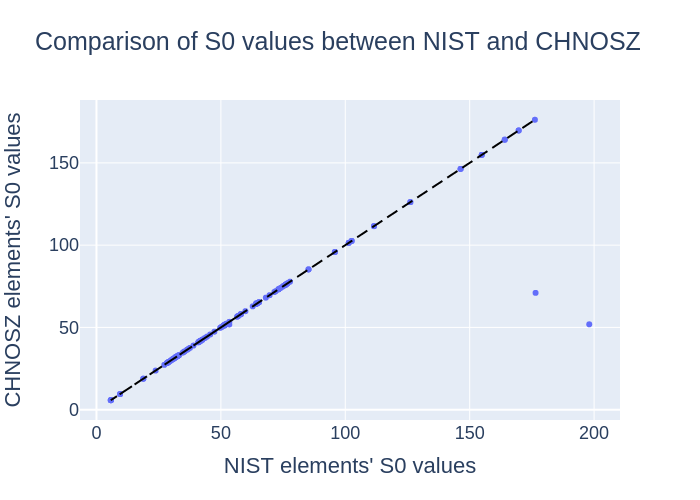

In [22]:
fig = go.Figure()

fig1 = go.Scatter(
    x=df_diff.S0["self"], 
    y=df_diff.S0["other"],
    mode='markers',
)

fig2 = go.Scatter(
    x=df_diff.S0["other"], 
    y=df_diff.S0["other"],
    mode='lines',
    line=dict(color="black", dash='dash'),
)
fig.add_traces([fig1, fig2])

fig.update_layout(
    title="Comparison of S0 values between NIST and CHNOSZ",
    xaxis_title="NIST elements' S0 values",
    yaxis_title="CHNOSZ elements' S0 values",
    showlegend=False,
    font=dict(
        size=18,
    )
)

fig.show()

In [23]:
element_S0_discrepancies = df_diff.S0["self"].values - df_diff.S0["other"].values

element_S0_discrepancies_dict = {
    "element": df_nist_elements_sorted.element.values,
    "S0 discrepancy": element_S0_discrepancies
}
df_element_S0_discrepancies = pd.DataFrame.from_dict(element_S0_discrepancies_dict)

df_element_S0_discrepancies

,element,S0 discrepancy
0,Ac,7.105427e-15
1,Ag,1.776357e-13
2,Ag,1.776357e-13
3,Al,3.000000e-02
4,Al,1.776357e-14
...,...,...
119,Y,-1.776357e-13
120,Yb,1.705303e-13
121,Zn,0.000000e+00
122,Zn,0.000000e+00


In [24]:
df_element_S0_discrepancies[
    np.abs(df_element_S0_discrepancies["S0 discrepancy"]) > 1
]

,element,S0 discrepancy
80,Pa,146.15
86,Ra,105.47
107,Th,1.59


Only `Pa` and `Ra` have a major discrepancy compared to NIST values. However, these species are rather uncommon and they present no harm to our study. Let's move on to the extension of NIST database with new features.

Iterating over the NIST database and add Se and the number of elements for each species in the `DataFrame`:

In [25]:
Se_species = []
n_elements_in_species = []
for index, row in df_nist_tables.iterrows():
    species_formula = row["Formula"]
    elements_in_species = parse_chemical_formula(species_formula)
    
    elements_S0 = 0.0
    n_elements = 0.0
    try:
        for element, count in elements_in_species.items():
            df_element = df_nist_elements.loc[df_nist_elements['element'] == element]
            elements_S0 += df_element['S0'].values[0] * count
            n_elements += count

    except IndexError:
        print(f"Skipping species {species_formula}: element {element} is lacking")
        elements_S0 = np.nan
        n_elements = np.nan
    
    Se_species.append(elements_S0)
    n_elements_in_species.append(n_elements)
    
df_nist_tables["Se"] = Se_species
df_nist_tables["Num Elements"] = n_elements_in_species

Skipping species D: element D is lacking
Skipping species D2: element D is lacking
Skipping species HD: element D is lacking
Skipping species OD: element D is lacking
Skipping species D2O: element D is lacking
Skipping species D2O: element D is lacking
Skipping species HDO: element D is lacking
Skipping species YD2: element D is lacking
Skipping species YD3: element D is lacking
Skipping species LiD: element D is lacking
Skipping species LiD: element D is lacking
Skipping species KD: element D is lacking


/tmp/ipykernel_4357/2531024654.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4357/2531024654.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_nist_tables.head(20)

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
0,O,g,15.9994,249.170,231.731,161.055,21.912,0.0,102.569,1.0
1,O2,g,31.9988,0,0,205.138,29.355,0.0,205.138,2.0
2,O3,g,47.9982,142.7,163.2,238.93,39.20,0.0,307.707,3.0
3,H,g,1.0080,217.965,203.247,114.713,20.784,0.0,65.342,1.0
4,H<sup>+</sup>,ao,1.0080,0,0,0,0,1.0,65.342,1.0
5,D,g,2.0141,221.673,206.506,123.349,20.786,0.0,NaN,NaN
6,H2,g,2.016,0,0,130.684,28.824,0.0,130.684,2.0
7,D2,g,4.0282,0,0,144.960,29.196,0.0,NaN,NaN
8,HD,g,3.0221,0.318,-1.464,143.801,29.196,0.0,NaN,NaN
9,OH,g,17.0074,38.95,34.23,183.745,29.886,0.0,167.911,2.0


Now, let's clean up and drop the species that we do not have values for Se or composed of unknown elements:

In [27]:
df_nist_tables.dropna(inplace=True, ignore_index=True)

df_nist_tables

/tmp/ipykernel_4357/665795724.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
0,O,g,15.9994,249.170,231.731,161.055,21.912,0.0,102.569,1.0
1,O2,g,31.9988,0,0,205.138,29.355,0.0,205.138,2.0
2,O3,g,47.9982,142.7,163.2,238.93,39.20,0.0,307.707,3.0
3,H,g,1.0080,217.965,203.247,114.713,20.784,0.0,65.342,1.0
4,H<sup>+</sup>,ao,1.0080,0,0,0,0,1.0,65.342,1.0
...,...,...,...,...,...,...,...,...,...,...
1503,CsBO2,g,175.7152,-703.3,-708.8,314.41,59.41,0.0,296.228,4.0
1504,CsAl(SO4)2·12H2O,cr,568.1949,-6094.8,-5167.4,686.09,614.6,0.0,3796.748,48.0
1505,CsCuCl3,cr,302.8044,-698.7,-627.1,213.38,127.82,0.0,452.979,5.0
1506,Cs2Cr2O7,cr,481.7986,-2088.82,-1908.17,330.08,231.54,0.0,935.983,11.0


## Data Exploration

### Check correlations

Let's check if the numerical data are correlated for the most present states of matter:

#### Overall

In [28]:
numerical_columns = [
    "Molar Mass", "deltaH0", "deltaG0", "S0", "Cp", "Charge", "Se", "Num Elements"
]
df_nist_tables_numerical = df_nist_tables[numerical_columns]
df_nist_tables_numerical = df_nist_tables_numerical.astype(float)
df_nist_tables[numerical_columns] = df_nist_tables[numerical_columns].astype(float)

df_nist_tables_numerical.head(15)

/tmp/ipykernel_4357/2359166221.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
0,15.9994,249.170,231.731,161.055,21.912,0.0,102.569,1.0
1,31.9988,0.000,0.000,205.138,29.355,0.0,205.138,2.0
2,47.9982,142.700,163.200,238.930,39.200,0.0,307.707,3.0
3,1.0080,217.965,203.247,114.713,20.784,0.0,65.342,1.0
4,1.0080,0.000,0.000,0.000,0.000,1.0,65.342,1.0
5,2.0160,0.000,0.000,130.684,28.824,0.0,130.684,2.0
6,17.0074,38.950,34.230,183.745,29.886,0.0,167.911,2.0
7,17.0074,-229.994,-157.244,-10.750,-148.500,-1.0,167.911,2.0
8,33.0068,10.500,22.600,229.000,34.890,0.0,270.480,3.0
9,18.0154,-285.830,-237.129,69.910,75.291,0.0,233.253,3.0


Molar mass distribution:

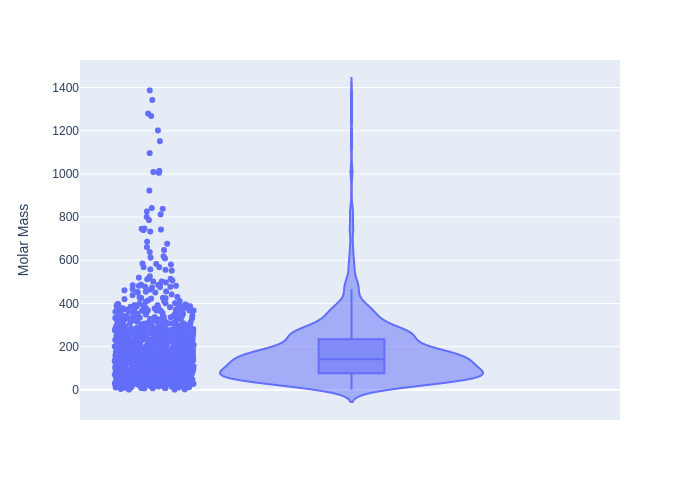

In [29]:
fig = px.violin(df_nist_tables, y="Molar Mass", box=True, points='all')
fig.show()

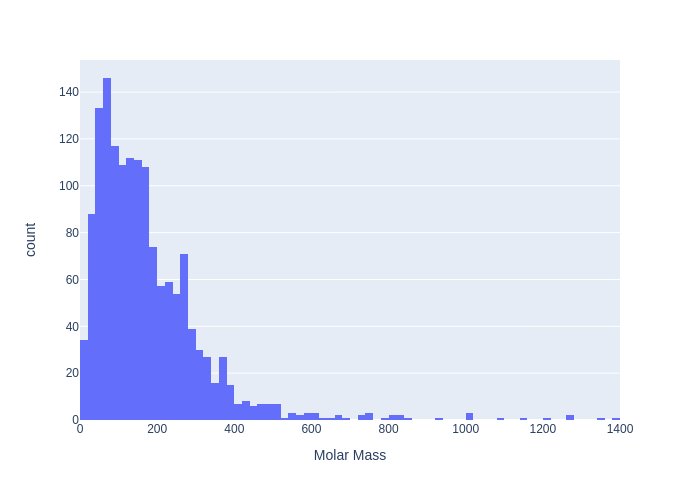

In [30]:
fig = px.histogram(df_nist_tables, x="Molar Mass")
fig.show()

Molar mass distribution by state of matter:

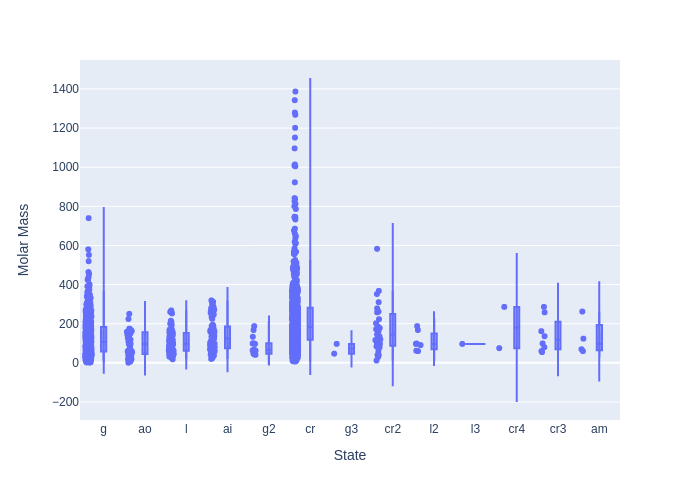

In [31]:
fig = px.violin(df_nist_tables, x="State", y="Molar Mass", box=True, points='all')
fig.show()

Check for (linear) correlations with Pearson's approach

In [32]:
df_nist_tables_numerical = df_nist_tables[numerical_columns]
df_nist_tables_numerical = df_nist_tables_numerical.astype(float)

df_nist_tables_numerical.head(15)

,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
0,15.9994,249.170,231.731,161.055,21.912,0.0,102.569,1.0
1,31.9988,0.000,0.000,205.138,29.355,0.0,205.138,2.0
2,47.9982,142.700,163.200,238.930,39.200,0.0,307.707,3.0
3,1.0080,217.965,203.247,114.713,20.784,0.0,65.342,1.0
4,1.0080,0.000,0.000,0.000,0.000,1.0,65.342,1.0
5,2.0160,0.000,0.000,130.684,28.824,0.0,130.684,2.0
6,17.0074,38.950,34.230,183.745,29.886,0.0,167.911,2.0
7,17.0074,-229.994,-157.244,-10.750,-148.500,-1.0,167.911,2.0
8,33.0068,10.500,22.600,229.000,34.890,0.0,270.480,3.0
9,18.0154,-285.830,-237.129,69.910,75.291,0.0,233.253,3.0


In [33]:
df_all_corr = df_nist_tables_numerical.corr(method='spearman')

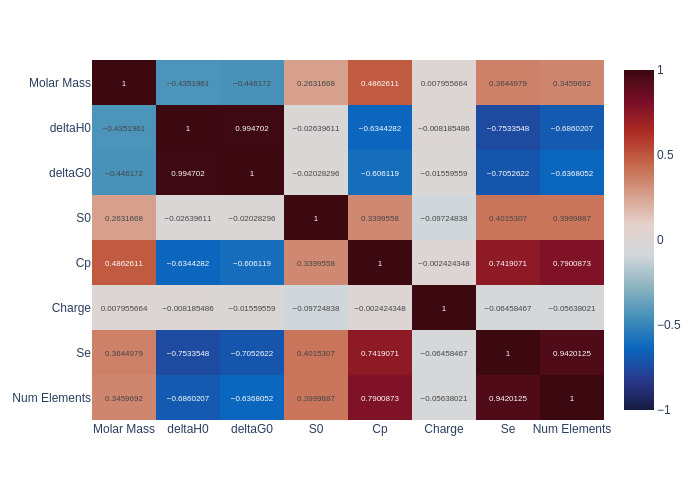

In [34]:
fig = px.imshow(df_all_corr, text_auto=True, aspect="auto", color_continuous_scale='balance', zmin=-1, zmax=1)
fig.show()

#### Solid (cr)

In [35]:
df_nist_tables_solids = df_nist_tables[
    df_nist_tables["State"].isin(["cr", "cr2", "cr3", "cr4"])
]

df_nist_tables_solids.head(20)

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
53,I2,cr,253.8088,0.00,0.00,116.135,54.438,0.0,116.1350,2.0
63,S,cr,32.0640,0.00,0.00,31.800,22.640,0.0,31.8000,1.0
89,Se,cr,78.9600,0.00,0.00,42.442,25.363,0.0,42.4420,1.0
95,Te,cr,127.6000,0.00,0.00,49.710,25.730,0.0,49.7100,1.0
109,N2O5,cr,108.0104,-43.10,113.90,178.200,143.100,0.0,704.4550,7.0
130,NH4NO3,cr,80.0436,-365.56,-183.87,151.080,139.300,0.0,760.6850,9.0
138,NH4F,cr,37.0371,-463.96,-348.68,71.960,65.270,0.0,458.5630,6.0
140,NH4HF2,cr,57.0435,-802.90,-650.90,115.520,106.690,0.0,625.2950,8.0
143,NH4Cl,cr,53.4917,-314.43,-202.87,94.600,84.100,0.0,468.7060,6.0
147,NH4Br,cr,97.9477,-270.83,-175.20,113.000,96.000,0.0,433.2885,6.0


In [36]:
df_nist_tables_solids_numerical = df_nist_tables_solids[numerical_columns]
df_nist_tables_solids_numerical = df_nist_tables_solids_numerical.astype(float)

df_nist_tables_solids_numerical.head(15)

,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
53,253.8088,0.00,0.00,116.135,54.438,0.0,116.1350,2.0
63,32.0640,0.00,0.00,31.800,22.640,0.0,31.8000,1.0
89,78.9600,0.00,0.00,42.442,25.363,0.0,42.4420,1.0
95,127.6000,0.00,0.00,49.710,25.730,0.0,49.7100,1.0
109,108.0104,-43.10,113.90,178.200,143.100,0.0,704.4550,7.0
130,80.0436,-365.56,-183.87,151.080,139.300,0.0,760.6850,9.0
138,37.0371,-463.96,-348.68,71.960,65.270,0.0,458.5630,6.0
140,57.0435,-802.90,-650.90,115.520,106.690,0.0,625.2950,8.0
143,53.4917,-314.43,-202.87,94.600,84.100,0.0,468.7060,6.0
147,97.9477,-270.83,-175.20,113.000,96.000,0.0,433.2885,6.0


In [37]:
df_solids_corr = df_nist_tables_solids_numerical.corr(method='spearman')

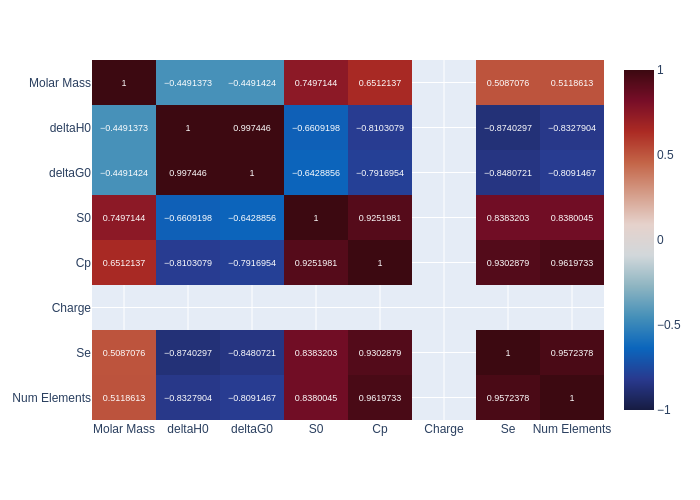

In [38]:
fig = px.imshow(df_solids_corr, text_auto=True, aspect="auto", color_continuous_scale='balance', zmin=-1, zmax=1)
fig.show()

The correlation between the std properties are expected! However, given the molar mass and charge (which does not apply to solids), we want to predict the std properties. Let's continue and check for the other states.

Checking how `deltaH0` varies with the Molar Mass:

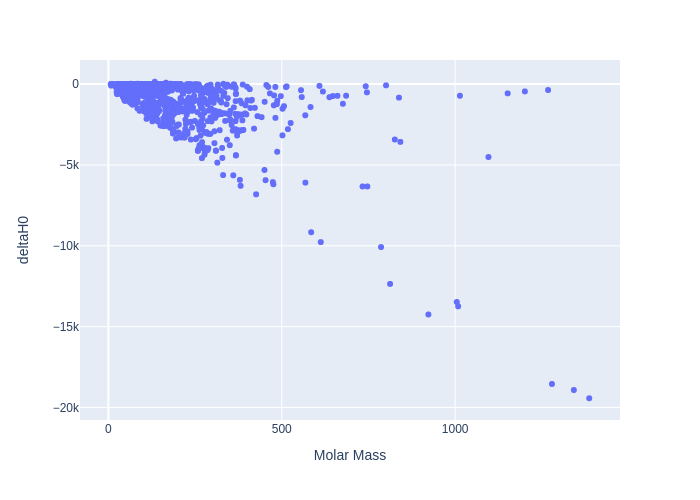

In [39]:
fig = px.scatter(
    df_nist_tables_solids_numerical, x="Molar Mass", y="deltaH0"
)
fig.show()

Checking how `deltaG0` varies with the Molar Mass:

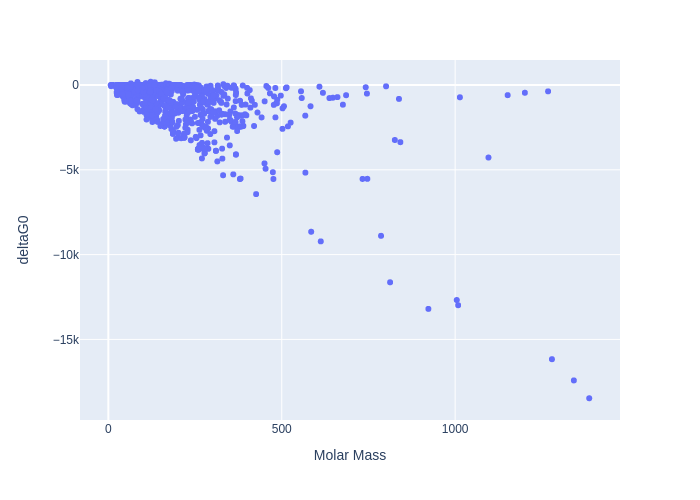

In [40]:
fig = px.scatter(
    df_nist_tables_solids_numerical, x="Molar Mass", y="deltaG0"
)
fig.show()

`S0`:

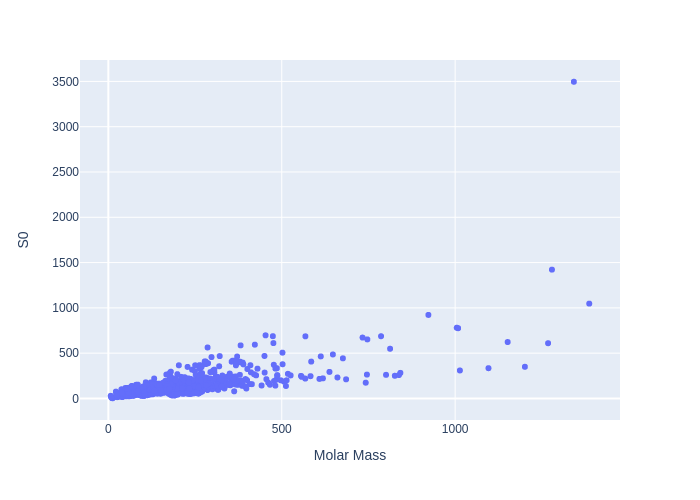

In [41]:
fig = px.scatter(
    df_nist_tables_solids_numerical, x="Molar Mass", y="S0"
)
fig.show()

`Cp`:

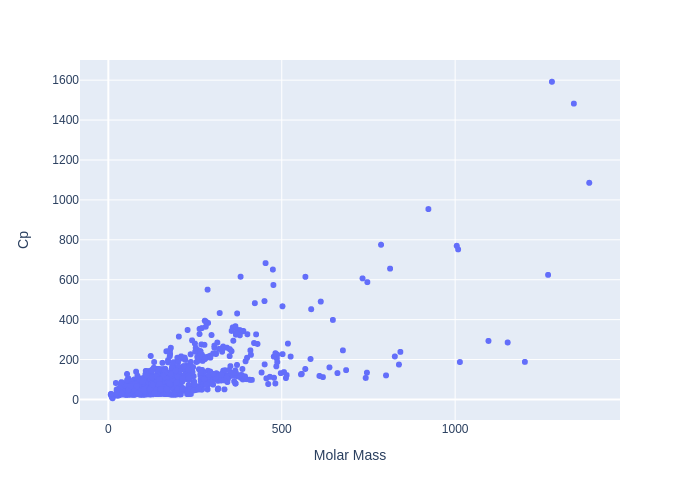

In [42]:
fig = px.scatter(
    df_nist_tables_solids_numerical, x="Molar Mass", y="Cp"
)
fig.show()

The distribution of molar mass values:

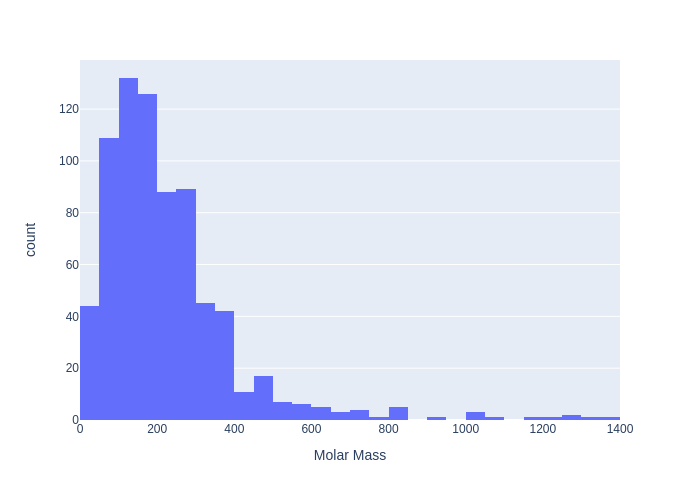

In [43]:
fig = px.histogram(df_nist_tables_solids_numerical, x="Molar Mass")
fig.show()

#### Gas species

In [44]:
df_nist_tables_gas = df_nist_tables[
    df_nist_tables["State"].isin(["g", "g2"])
]

df_nist_tables_gas_numerical = df_nist_tables_gas[numerical_columns]
df_nist_tables_gas_numerical = df_nist_tables_gas_numerical.astype(float)

df_nist_tables_gas_numerical.head(15)

,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements
0,15.9994,249.170,231.731,161.055,21.912,0.0,102.569,1.0
1,31.9988,0.000,0.000,205.138,29.355,0.0,205.138,2.0
2,47.9982,142.700,163.200,238.930,39.200,0.0,307.707,3.0
3,1.0080,217.965,203.247,114.713,20.784,0.0,65.342,1.0
5,2.0160,0.000,0.000,130.684,28.824,0.0,130.684,2.0
6,17.0074,38.950,34.230,183.745,29.886,0.0,167.911,2.0
8,33.0068,10.500,22.600,229.000,34.890,0.0,270.480,3.0
10,18.0154,-241.818,-228.572,188.825,33.577,0.0,233.253,3.0
12,34.0148,-136.310,-105.570,232.700,43.100,0.0,335.822,4.0
13,4.0026,0.000,0.000,126.150,20.786,0.0,126.150,1.0


In [45]:
df_gas_corr = df_nist_tables_gas_numerical.corr(method='spearman')

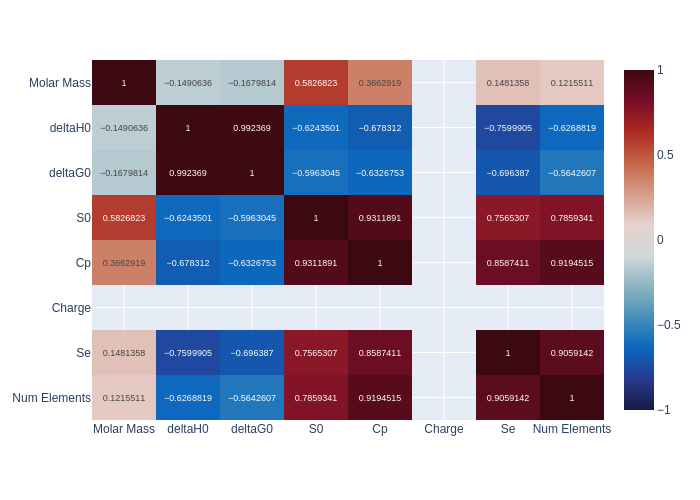

In [46]:
fig = px.imshow(df_gas_corr, text_auto=True, aspect="auto", color_continuous_scale='balance', zmin=-1, zmax=1)
fig.show()

Checking how the std properties vary with the molar mass:

`deltaH0`:

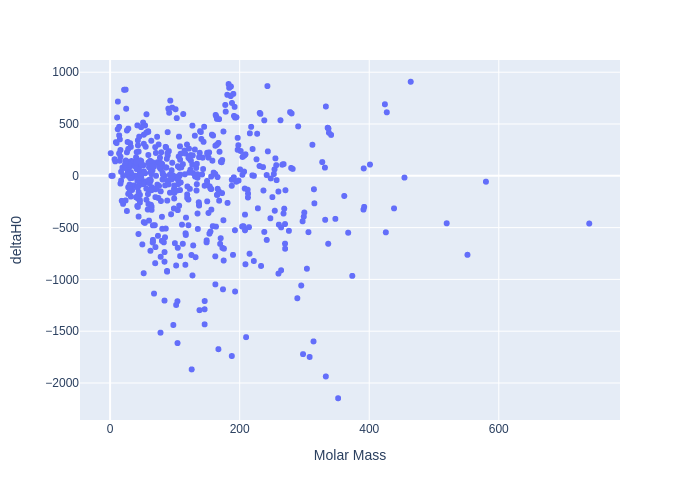

In [47]:
fig = px.scatter(
    df_nist_tables_gas_numerical, x="Molar Mass", y="deltaH0"
)
fig.show()

`deltaG0`:

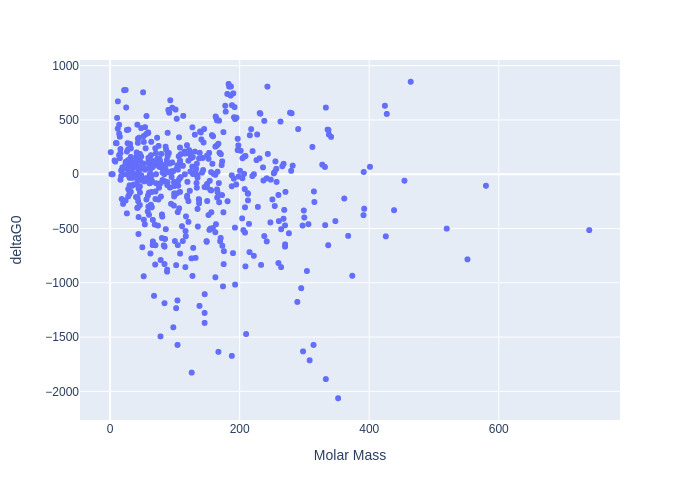

In [48]:
fig = px.scatter(
    df_nist_tables_gas_numerical, x="Molar Mass", y="deltaG0"
)
fig.show()

`S0`:

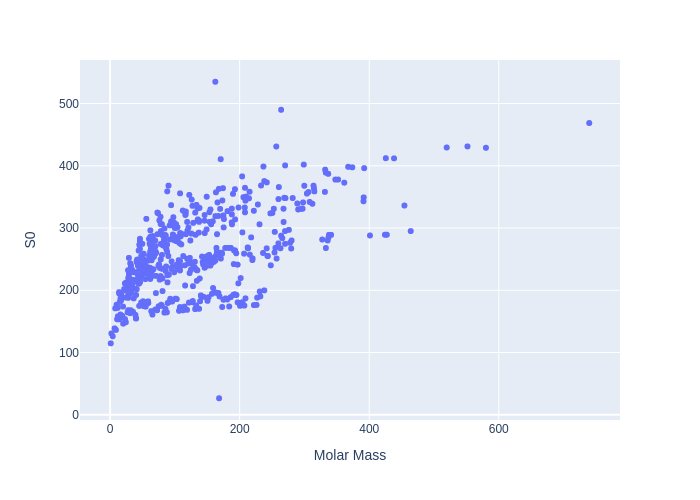

In [49]:
fig = px.scatter(
    df_nist_tables_gas_numerical, x="Molar Mass", y="S0"
)
fig.show()

`Cp`:

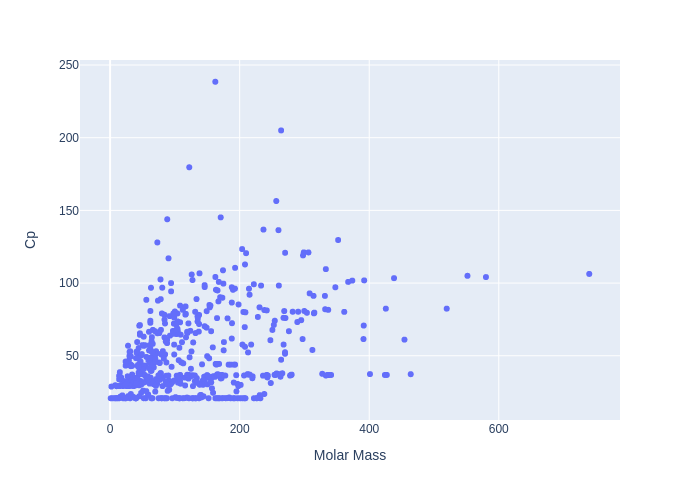

In [50]:
fig = px.scatter(
    df_nist_tables_gas_numerical, x="Molar Mass", y="Cp"
)
fig.show()

Check the distribution of molar mass values:

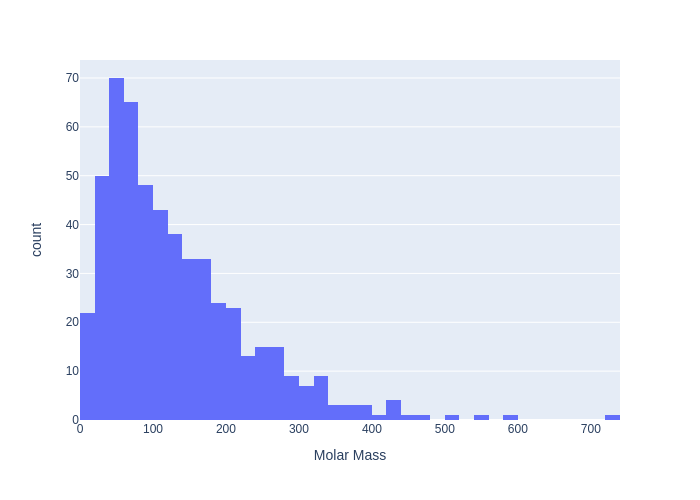

In [51]:
fig = px.histogram(df_nist_tables_gas_numerical, x="Molar Mass")
fig.show()

#### Aqueous species

In [52]:
df_nist_tables_aq = df_nist_tables[
    df_nist_tables["State"].isin(["ai", "ao"])
]

df_nist_tables_aq_numerical = df_nist_tables_aq[numerical_columns]
df_nist_tables_aq_numerical = df_nist_tables_aq_numerical.astype(float)

In [53]:
df_aq_corr = df_nist_tables_aq_numerical.corr(method='spearman')

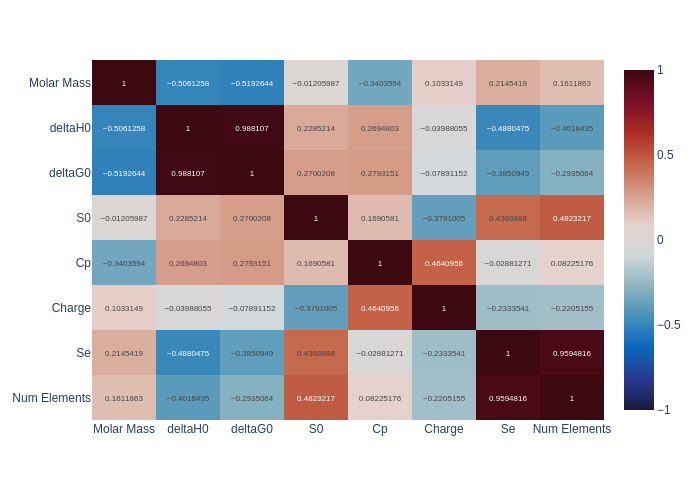

In [54]:
fig = px.imshow(df_aq_corr, text_auto=True, aspect="auto", color_continuous_scale='balance', zmin=-1, zmax=1)
fig.show()

Checking how the std properties vary with the molar mass:

`deltaH0`:

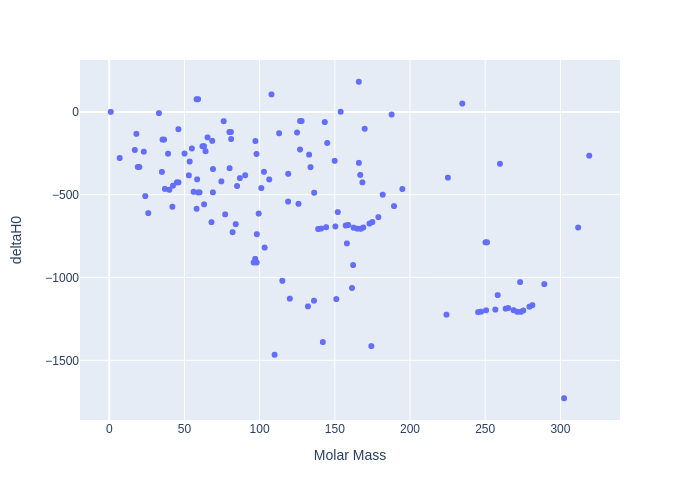

In [55]:
fig = px.scatter(
    df_nist_tables_aq_numerical, x="Molar Mass", y="deltaH0"
)
fig.show()

`deltaG0`:

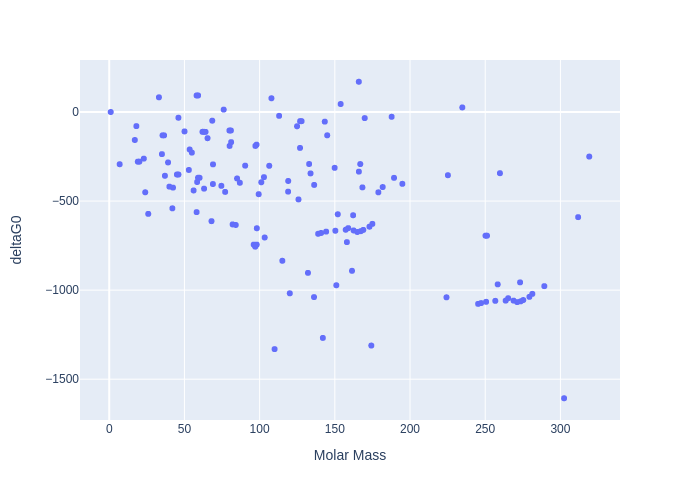

In [56]:
fig = px.scatter(
    df_nist_tables_aq_numerical, x="Molar Mass", y="deltaG0"
)
fig.show()

`S0`:

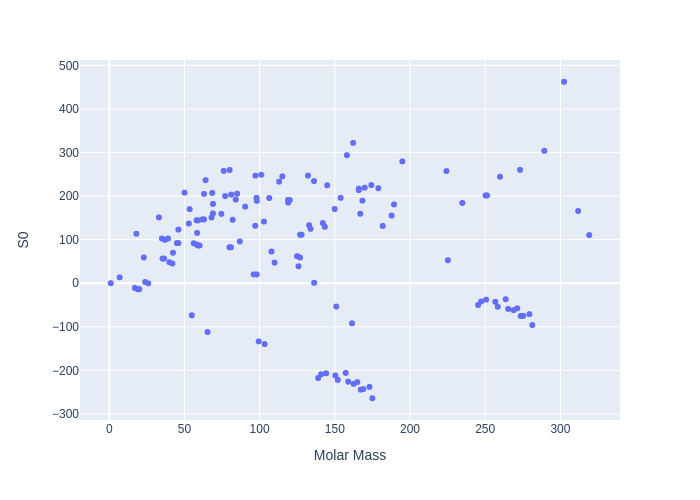

In [57]:
fig = px.scatter(
    df_nist_tables_aq_numerical, x="Molar Mass", y="S0"
)
fig.show()

`Cp`:

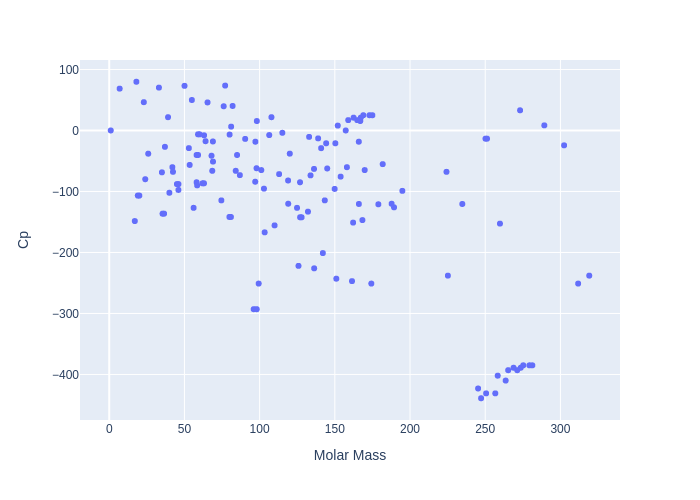

In [58]:
fig = px.scatter(
    df_nist_tables_aq_numerical, x="Molar Mass", y="Cp"
)
fig.show()

Checking how the std properties vary with the charge:

`deltaH0`:

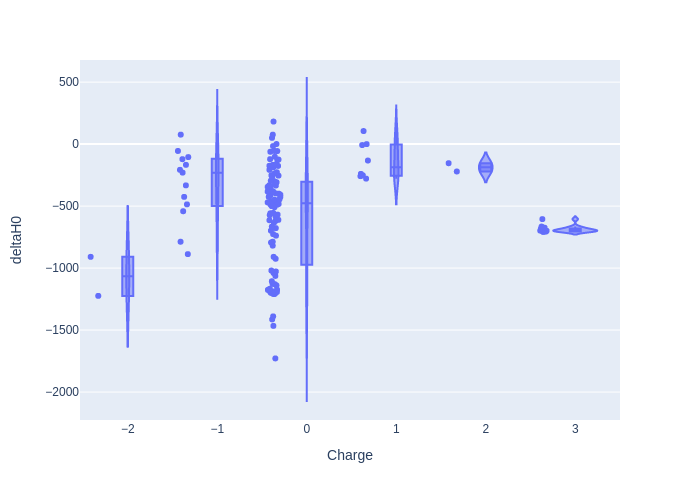

In [59]:
fig = px.violin(
    df_nist_tables_aq_numerical, x="Charge", y="deltaH0", box=True, points="all"
)
fig.show()

`deltaG0`:

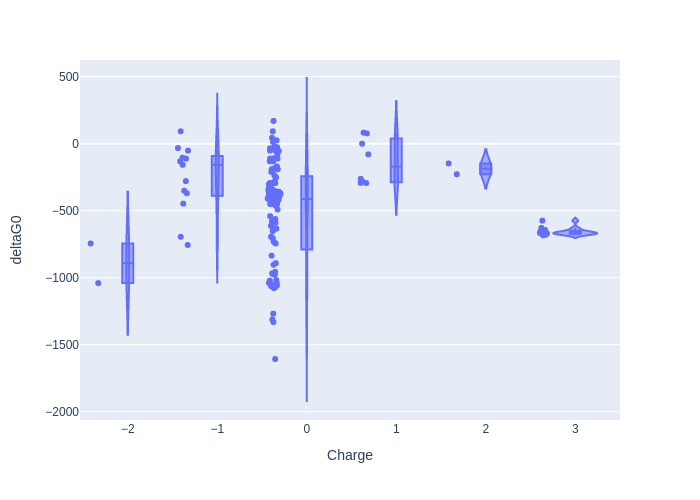

In [60]:
fig = px.violin(
    df_nist_tables_aq_numerical, x="Charge", y="deltaG0", points="all", box=True
)
fig.show()

`S0`:

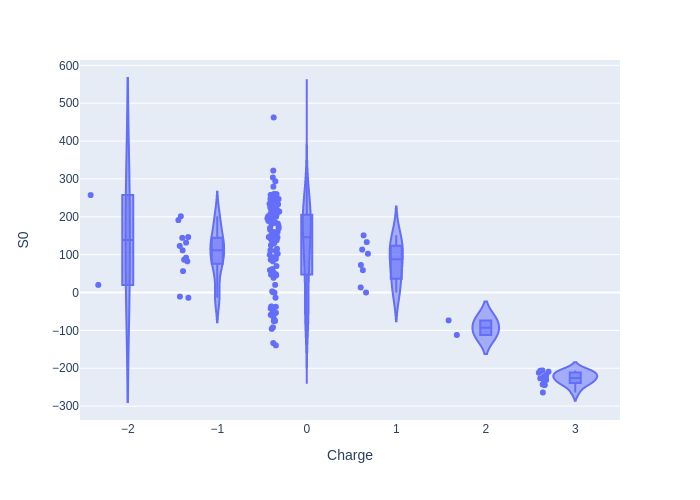

In [61]:
fig = px.violin(
    df_nist_tables_aq_numerical, x="Charge", y="S0", points="all", box=True
)
fig.show()

`Cp`:

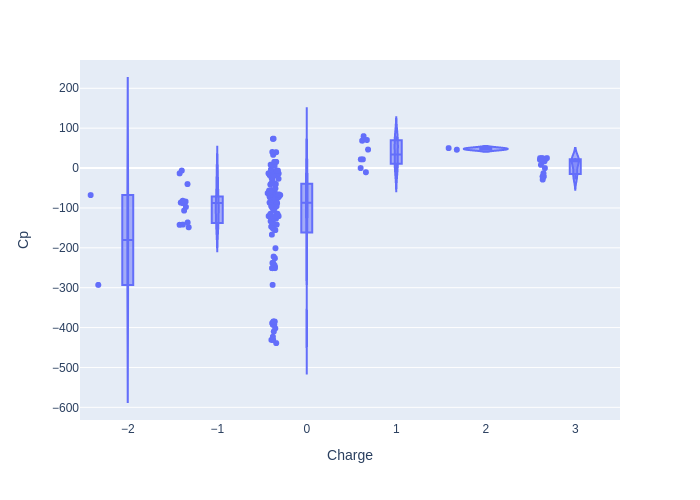

In [62]:
fig = px.violin(
    df_nist_tables_aq_numerical, x="Charge", y="Cp", points="all", box=True
)
fig.show()

#### Liquid species

In [63]:
df_nist_tables_liq = df_nist_tables[
    df_nist_tables["State"].isin(["l", "l2"])
]

df_nist_tables_liq_numerical = df_nist_tables_liq[numerical_columns]
df_nist_tables_liq_numerical = df_nist_tables_liq_numerical.astype(float)

In [64]:
df_liq_corr = df_nist_tables_liq_numerical.corr(method='spearman')

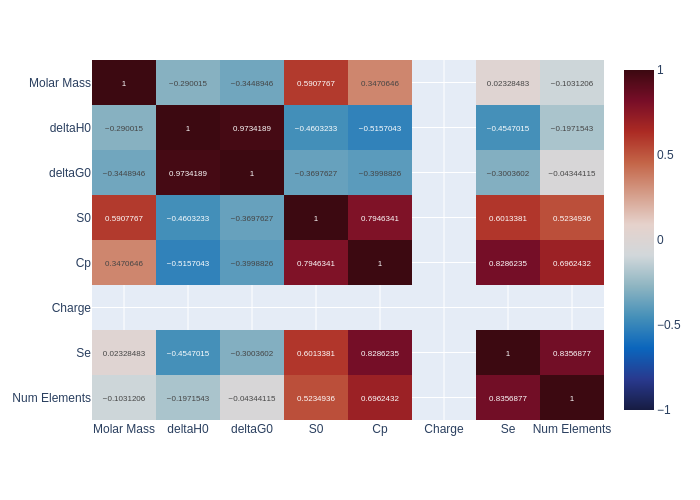

In [65]:
fig = px.imshow(df_liq_corr, text_auto=True, aspect="auto", color_continuous_scale='balance', zmin=-1, zmax=1)
fig.show()

Checking how the std properties vary with the molar mass:

`deltaH0`:

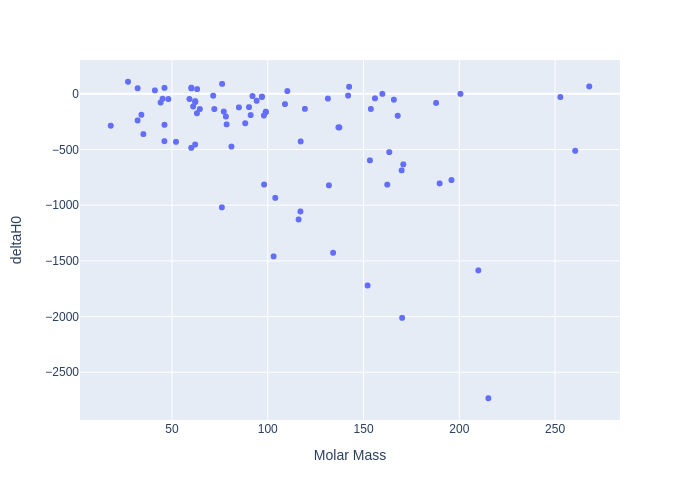

In [66]:
fig = px.scatter(
    df_nist_tables_liq_numerical, x="Molar Mass", y="deltaH0"
)
fig.show()

`deltaG0`:

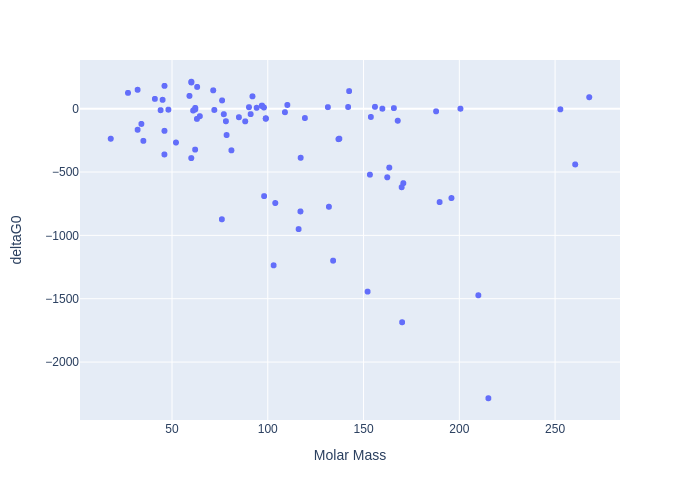

In [67]:
fig = px.scatter(
    df_nist_tables_liq_numerical, x="Molar Mass", y="deltaG0"
)
fig.show()

`S0`:

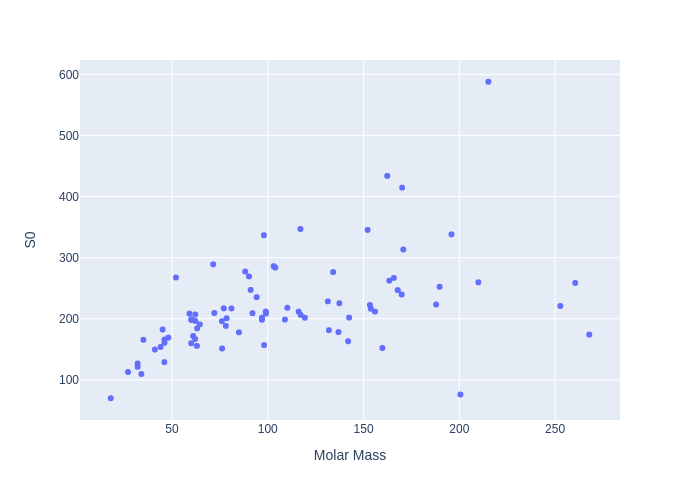

In [68]:
fig = px.scatter(
    df_nist_tables_liq_numerical, x="Molar Mass", y="S0"
)
fig.show()

`Cp`:

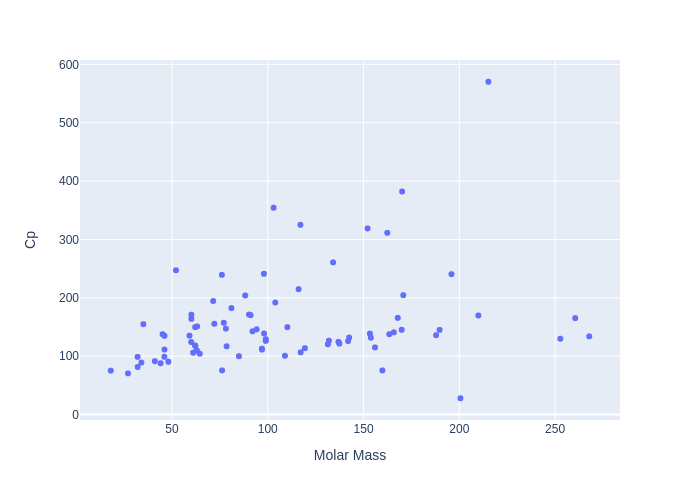

In [69]:
fig = px.scatter(
    df_nist_tables_liq_numerical, x="Molar Mass", y="Cp"
)
fig.show()

### Std thermodynamic properties consistency

The goal here is to perform the G-H-S (standard free Gibbs energy of formation, enthalpy, and entropy). These quantities are related through the formula:

\begin{equation*}
\Delta_{\mathrm{f}} G^{\circ}=\Delta_{\mathrm{f}} H^{\circ}-T \Delta_{\mathrm{f}} S^{\circ}
\end{equation*}

With $\Delta_{\mathrm{f}} S^{\circ}$ calculated as

\begin{equation*}
\Delta_{\mathrm{f}} S^{\circ} = S^{\circ}_{\text{species}} - \sum_{e \in \text{Elements}}S^{\circ}_e
\end{equation*}

The reference temperature is set as $T = 298.15$ K.

However, to check the consistency we need to retrieve the chemical formulas and the associated elements, and then compute the entropy from the elements. This required and additional database of elements collected from [CHNOSZ](https://github.com/jedick/CHNOSZ/blob/main/inst/extdata/thermo/element.csv). This step is already done in the extension of the NIST DB features in the beginning of this notebook. So we will move to calculate the GHS residuals.

Iterate over all NIST data and compute the GHS residual:

In [70]:
aqueous_states = [
    "ai", "ao", "aq", "ai2", "ao2", "aq2", "aq3", "ao4", "aq4"
]

H2_species_refdata = df_nist_tables.loc[
    (df_nist_tables["Formula"] == "H2") & (df_nist_tables["State"] == "g")
]

GHS_residuals = []
T = 298.15
for index, row in df_nist_tables.iterrows():
    species_formula = row["Formula"]
    species_state = row["State"]
    is_species_aqueous = species_state in aqueous_states
    elements_in_species = parse_chemical_formula(species_formula)
    
    species_dG0 = row["deltaG0"]
    species_dH0 = row["deltaH0"]
    species_S0 = row["S0"]
    
    elements_S0 = 0.0
    try:
        for element, count in elements_in_species.items():
            df_element = df_nist_elements.loc[df_nist_elements['element'] == element]
            elements_S0 += df_element['S0'].values[0] * count
        
        if is_species_aqueous:
            species_charge = row["Charge"]
            H2_g_S0 = H2_species_refdata['S0'].values[0]
            elements_S0 += (species_charge / 2) * H2_g_S0 * T
    except IndexError:
        print(f"Skipping species {species_formula}: element {element} is lacking")
        elements_S0 = np.nan
    
    species_dS0 = species_S0 - elements_S0
    
    GHS_residual = species_dG0 * 1000 - species_dH0 * 1000 + T * species_dS0
    GHS_residuals.append(GHS_residual)
    
# GHS_residuals

In [71]:
df_nist_tables["GHS residual"] = GHS_residuals

df_nist_tables.head(20)

/tmp/ipykernel_4357/2424025603.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements,GHS residual
0,O,g,15.9994,249.170,231.731,161.055,21.912,0.0,102.569,1.0,-1.399100e+00
1,O2,g,31.9988,0.000,0.000,205.138,29.355,0.0,205.138,2.0,0.000000e+00
2,O3,g,47.9982,142.700,163.200,238.930,39.200,0.0,307.707,3.0,-5.862550e+00
3,H,g,1.0080,217.965,203.247,114.713,20.784,0.0,65.342,1.0,1.963650e+00
4,H<sup>+</sup>,ao,1.0080,0.000,0.000,0.000,0.000,1.0,65.342,1.0,-5.827956e+06
5,H2,g,2.0160,0.000,0.000,130.684,28.824,0.0,130.684,2.0,0.000000e+00
6,OH,g,17.0074,38.950,34.230,183.745,29.886,0.0,167.911,2.0,9.071000e-01
7,OH<sup>-</sup>,ao,17.0074,-229.994,-157.244,-10.750,-148.500,-1.0,167.911,2.0,5.827956e+06
8,HO2,g,33.0068,10.500,22.600,229.000,34.890,0.0,270.480,3.0,-2.672620e+02
9,H2O,l,18.0154,-285.830,-237.129,69.910,75.291,0.0,233.253,3.0,2.845500e-01


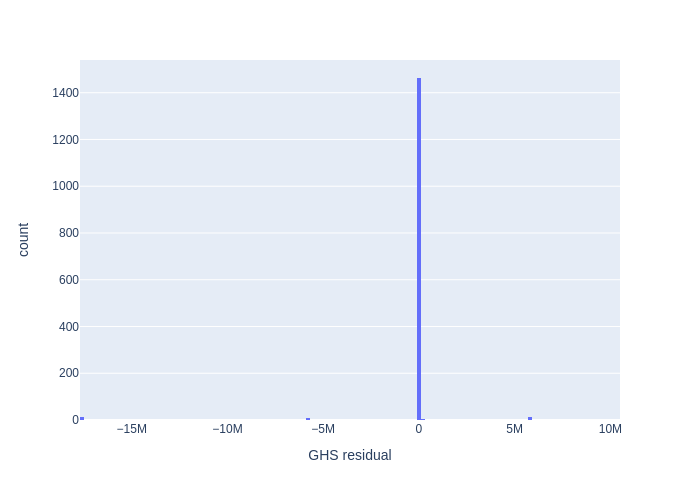

In [72]:
fig = px.histogram(df_nist_tables, x="GHS residual")
fig.show()

In [73]:
df_nist_tables_inconsistent_all = df_nist_tables[abs(df_nist_tables['GHS residual']) > 200]

df_nist_tables_inconsistent_all.State.value_counts()

State
cr     130
g       95
ao      39
ai      14
l        7
cr2      3
g2       2
Name: count, dtype: int64

Check the consistency only for valid molecules (that can be formed or composed):

In [74]:
df_nist_tables_inconsistent = df_nist_tables[
    (abs(df_nist_tables['GHS residual']) > 200) & (df_nist_tables['Charge'] == 0.0)
]

df_nist_tables_inconsistent

,Formula,State,Molar Mass,deltaH0,deltaG0,S0,Cp,Charge,Se,Num Elements,GHS residual
8,HO2,g,33.0068,10.500,22.600,229.00,34.89,0.0,270.480,3.0,-267.26200
37,ClF3,g,92.4482,-163.200,-123.000,281.61,63.85,0.0,415.703,4.0,220.17205
81,H2SO4·6.5H2O,l,215.1777,-2733.256,-2285.734,587.89,570.28,0.0,806.013,10.0,382488.62755
82,SF4,g,108.0576,-774.900,-731.300,292.03,73.01,0.0,437.360,5.0,269.86050
94,SeF6,g,192.9504,-1117.000,-1017.000,313.87,110.50,0.0,650.782,7.0,-450.31280
...,...,...,...,...,...,...,...,...,...,...,...
1458,Rb2F2,g,208.9324,-854.000,-849.000,344.00,79.90,0.0,356.340,4.0,1320.82900
1462,Rb2Cl2,g,241.8416,-619.000,-619.000,373.30,81.20,0.0,376.626,4.0,-991.64690
1482,CsOH,g,149.9128,-247.000,-247.000,254.83,49.71,0.0,253.141,3.0,503.57535
1494,CS2Br2,g,425.6288,-545.600,-572.400,412.20,82.40,0.0,221.571,5.0,30036.03635


In [75]:
df_nist_tables_inconsistent["State"].value_counts()

State
cr     130
g       95
ai      14
l        7
cr2      3
g2       2
ao       1
Name: count, dtype: int64

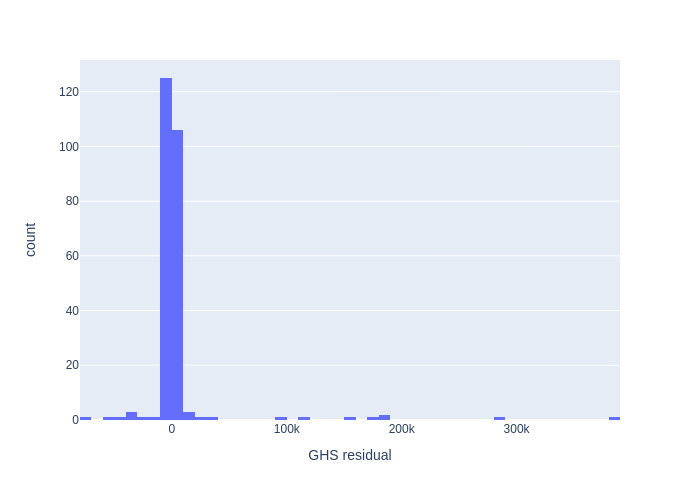

In [76]:
fig = px.histogram(df_nist_tables_inconsistent, x="GHS residual")
fig.show()

Now, let's check the consistent species:

In [77]:
df_nist_tables_consistent = df_nist_tables[
    (abs(df_nist_tables['GHS residual']) < 50) & (df_nist_tables['Charge'] == 0.0)
]

df_nist_tables_consistent.shape

(715, 11)

In [78]:
df_nist_tables_consistent["State"].value_counts()

State
cr     339
g      233
ai      55
l       44
cr2     20
g2       9
cr3      5
l2       4
cr4      2
am       2
l3       1
g3       1
Name: count, dtype: int64

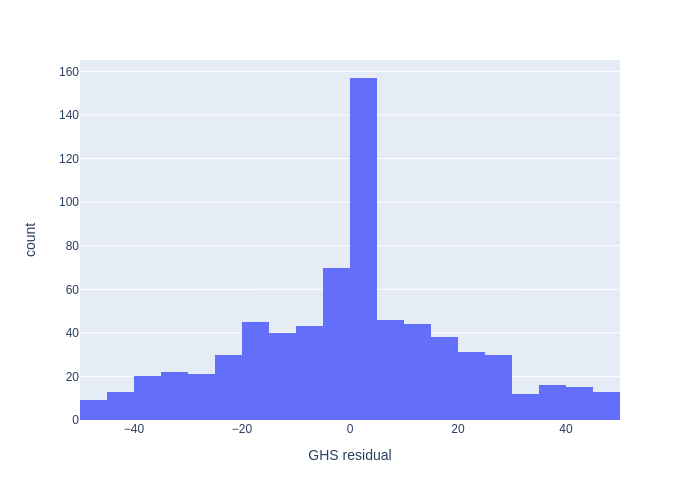

In [79]:
fig = px.histogram(df_nist_tables_consistent, x="GHS residual")
fig.show()